In [1]:
import os 
import sys
# Ajouter le chemin du répertoire parent de cifar10_classification
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


In [2]:
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from cifar10_classification.plots import plot_confusion_matrix, plot_roc_curve
from cifar10_classification.dataset import prepare_data
from cifar10_classification.features import extract_features, extract_hog_features, extract_sift_features
from cifar10_classification.modeling.predict import predict_model
from cifar10_classification.config import LABEL_NAMES, NUM_CLASSES, DATA_DIR, MODEL_DIR, FIGURES_DIR, EXTERNAL_DATA_DIR


In [3]:
# Chemins vers les modèles sauvegardés
MODEL_PATHS = {
    'logistic_hog': MODEL_DIR + '/logistic_hog_best_model.pkl',
    'random_forest_hog': MODEL_DIR + '/random_forest_hog_best_model.pkl',
    'svm_hog': MODEL_DIR + '/svm_hog_best_model.pkl'
}

In [4]:
def load_model(path):
    model = joblib.load(path)
    return model

# Charger les modèles
models = {name: load_model(path) for name, path in MODEL_PATHS.items()}
import pandas as pd

/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.0 when using version 1.3.0. This

In [6]:
import skimage 
from skimage import io, transform
# Fonction pour charger et prétraiter une image
def preprocess_image(image_path, method='hog'):
    image = io.imread(image_path)
    image_resized = transform.resize(image, (32, 32), anti_aliasing=True)
    if method == 'hog':
        image_features = extract_hog_features([image_resized])
    # elif method == 'sift':
    #     image_features = extract_sift_features([image_resized])
    # elif method == 'flatten':
    #     image_features = extrflatten_images([image_resized])
    else:
        raise ValueError(f"Unknown method: {method}")
    return image_features

# Fonction pour faire une prédiction
def predict_image(model, image_features):
    prediction = model.predict(image_features)
    return LABEL_NAMES[prediction[0]]



# Prédiction avec le random_forest

In [7]:
# Exemple d'utilisation
image_path = EXTERNAL_DATA_DIR + '/voiture.png'  # Remplacez ce chemin par le chemin de votre image
image_features = preprocess_image(image_path, method='hog')  # Remplacez 'hog' par la méthode appropriée
model_name = 'random_forest_hog'  # Remplacez par le nom du modèle que vous souhaitez utiliser
model = models[model_name]
prediction = predict_image(model, image_features)
print(f"Predicted label: {prediction}")


Predicted label: automobile


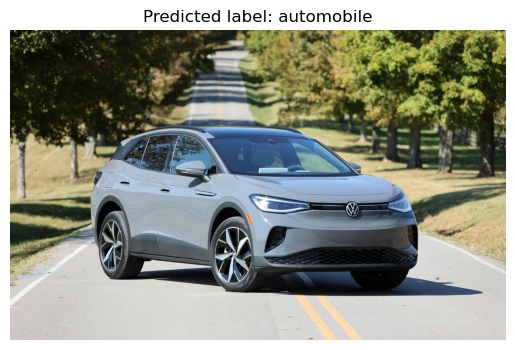

In [8]:

# Affichage de l'image
image = io.imread(image_path)
plt.imshow(image)
plt.title(f"Predicted label: {prediction}")
plt.axis('off')
plt.show()

# prediction avec le svm

In [9]:
# Exemple d'utilisation
image_path = EXTERNAL_DATA_DIR + '/voiture.png'  # Remplacez ce chemin par le chemin de votre image
image_features = preprocess_image(image_path, method='hog')  # Remplacez 'hog' par la méthode appropriée
model_name = 'svm_hog'  # Remplacez par le nom du modèle que vous souhaitez utiliser
model = models[model_name]
prediction = predict_image(model, image_features)
print(f"Predicted label: {prediction}")


Predicted label: deer


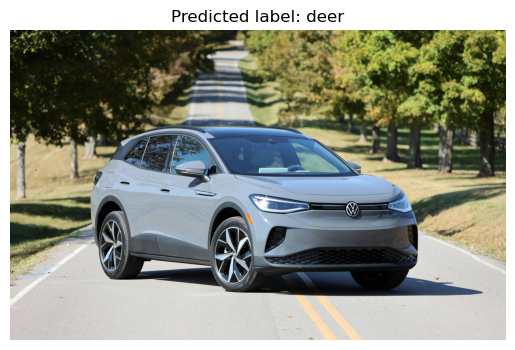

In [10]:

# Affichage de l'image
image = io.imread(image_path)
plt.imshow(image)
plt.title(f"Predicted label: {prediction}")
plt.axis('off')
plt.show()

# prediction avec logistic regression

In [11]:
# Exemple d'utilisation
image_path = EXTERNAL_DATA_DIR + '/voiture.png'  # Remplacez ce chemin par le chemin de votre image
image_features = preprocess_image(image_path, method='hog')  # Remplacez 'hog' par la méthode appropriée
model_name = 'logistic_hog'  # Remplacez par le nom du modèle que vous souhaitez utiliser
model = models[model_name]
prediction = predict_image(model, image_features)
print(f"Predicted label: {prediction}")


Predicted label: automobile


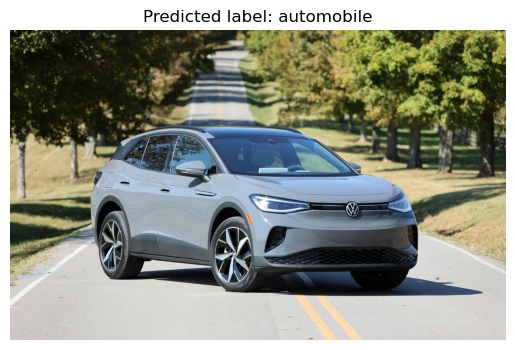

In [12]:

# Affichage de l'image
image = io.imread(image_path)
plt.imshow(image)
plt.title(f"Predicted label: {prediction}")
plt.axis('off')
plt.show()

# Conclusion 
Avec le logistic regression et le random forest j'obtiens l bon label
Mais pas avec le svm qui est pourtant mon meilleur model